In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
import pandas as pd

In [3]:
#help(pd.read_csv)

In [4]:
halos_list_file = '/home/babyostrich/data/mxxl/snap41/halos_41.txt'
halos_list = pd.read_csv(halos_list_file,header=1,sep='\t',
                        )

/home/babyostrich/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
halos_list.columns

Index([u'# Mass200', u'Radius200', u'Position_0', u'Position_1', u'Position_2',
       u'VirialRatio', u'CenterOfMassOffset', u'SubstructureFraction',
       u'EinastoParameter_0', u'EinastoParameter_1', u'EinastoParameter_2',
       u'HalfMassRadius', u'HalfMassFormationRedshift', u'SubhaloFileNumber',
       u'SubhaloFileOffset', u'EinastoMeanRhoR2', u'MeanRhorh',
       u'EinastoFormationRedshift'],
      dtype='object')

# Data check
Below, we do a quick check that the columns are aligned properly, and figure out units if needed

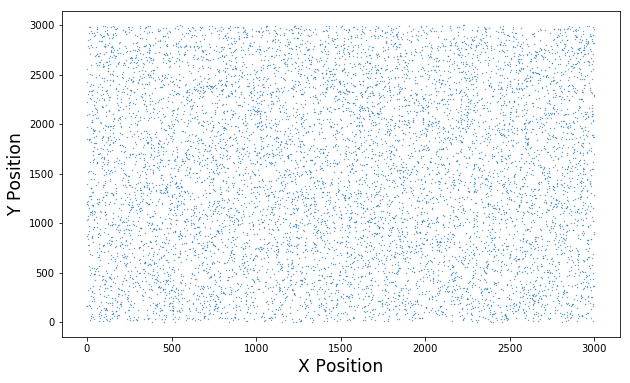

In [6]:
# Position in Mpc(?)
plt.scatter(halos_list['Position_0'][::100],halos_list['Position_1'][::100],s=0.1)
plt.xlabel('X Position',fontsize='xx-large')
plt.ylabel('Y Position',fontsize='xx-large')

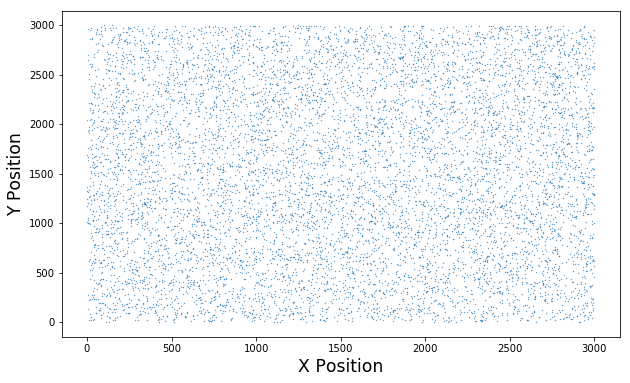

In [7]:
plt.scatter(halos_list['Position_1'][::100],halos_list['Position_2'][::100],s=0.1)
plt.xlabel('X Position',fontsize='xx-large')
plt.ylabel('Y Position',fontsize='xx-large')

Note: Need to find out units on below (either from Doug's code or from Stefan)

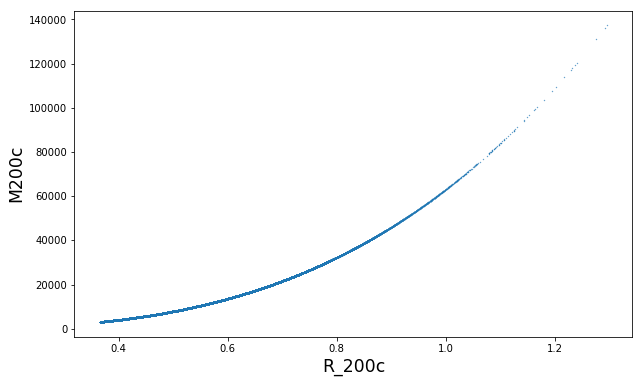

In [8]:
# Check units for mass and radius
import numpy as np
plt.scatter(halos_list['Radius200'].values,halos_list['# Mass200'].values,s=0.1)
plt.xlabel('R_200c',fontsize='xx-large') # Radius in Mpc(?) or Mpc/h(?)
plt.ylabel('M200c',fontsize='xx-large')  # Mass in....(?) units of 1e10Msun/h I think...

#  Note to self: Cross check with the massive_halos_41.M_200crit.txt and 
#  massive_halos_41.M_200crit.cumulative_mass_function.txt

# Distribution of halos
Now, we'll check for the distribution of halos as a function of relaxedness criteria: 'VirialRatio', 'CenterOfMassOffset', 'SubstructureFraction'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c4f3fe590>]], dtype=object)

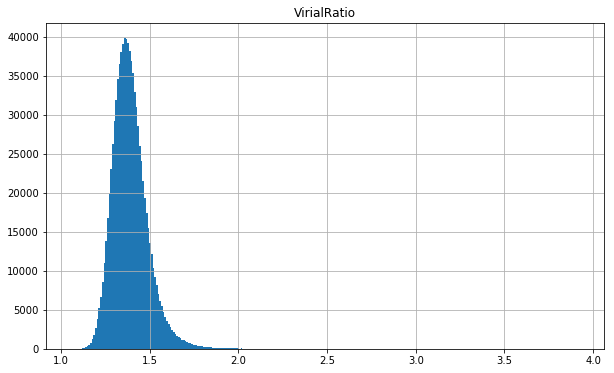

In [9]:
pd.DataFrame.hist(halos_list,column=['VirialRatio'],bins=300)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c4e535d50>]], dtype=object)

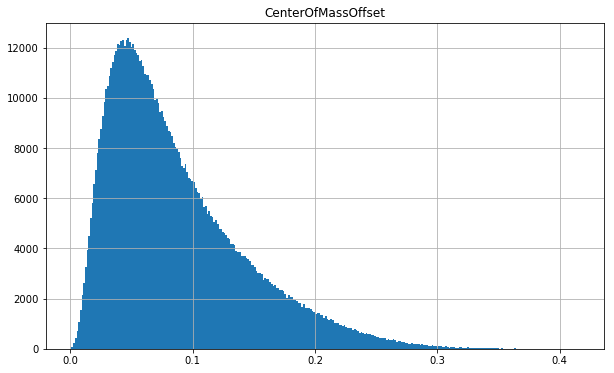

In [10]:
pd.DataFrame.hist(halos_list,column=['CenterOfMassOffset'],bins=300)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c4dcf2e50>]], dtype=object)

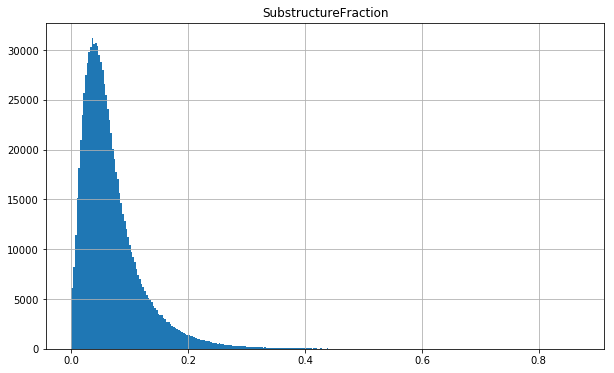

In [11]:
pd.DataFrame.hist(halos_list,column=['SubstructureFraction'],bins=300)

# Discussion of departures from equilibrium in Ludlow+12:
"As discussed by Neto et al. (2007), halo concentrations
can be affected by transient departures from equilibrium,
resulting in subtle biases in their mean mass dependence
and scatter. We therefore identify a subsample of
“relaxed” halos, as those that satisfy the following three criteria:
(i) fsub < 0.1, (ii) doff < 0.07 and (iii) 2T /|U| < 1.3.
Here fsub = Msub/M200 is the mass fraction contributed by
substructure; doff = |rp −rCM|/r200 is the offset between the position of the potential minimum and the halo barycenter **2nd is closer to observations**,
expressed in units of the virial radius; and 2T /|U| is the
virial ratio of kinetic to potential energies."  I will need to look at the M-c relationship for this with different cuts at z=0.  The observations are 10 percent of full sample.  

In [12]:
# Define the criteria
fsub_crit = halos_list['SubstructureFraction'] < 0.1
doff_crit = halos_list['CenterOfMassOffset'] < 0.07
vir_crit = halos_list['VirialRatio'] < 1.3
mass_crit = halos_list['# Mass200'] > 10000

In [13]:
def hist_with_criteria(df, column, criteria, bins=300) :
    ''' Plot the distribution of column given a criterion '''
    pd.DataFrame.hist(df.loc[criteria],column=[column],bins=300)

In [14]:
print 'Num Substructure Crit: ', halos_list.loc[fsub_crit].shape[0]
print 'Num Offset Crit: ', halos_list.loc[doff_crit].shape[0]
print 'Num Vir Crit: ', halos_list.loc[vir_crit].shape[0]
print 'Num Sub and Off Crit', halos_list.loc[fsub_crit&doff_crit].shape[0]
print 'Num Sub and Off Crit and Vir Crit', halos_list.loc[fsub_crit&doff_crit&vir_crit].shape[0]
print 'Num all halos: ', halos_list.shape[0]

Num Substructure Crit:  735293
Num Offset Crit:  433774
Num Vir Crit:  150471
Num Sub and Off Crit 411564
Num Sub and Off Crit and Vir Crit 102461
Num all halos:  910044


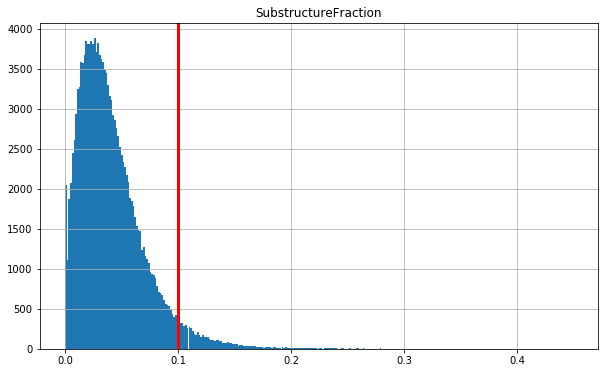

In [15]:
# Let's check how the distributions of the first two criteria change with the virial cut
hist_with_criteria(halos_list, 'SubstructureFraction', vir_crit)
plt.axvline(0.1,c='r',lw=3.0)

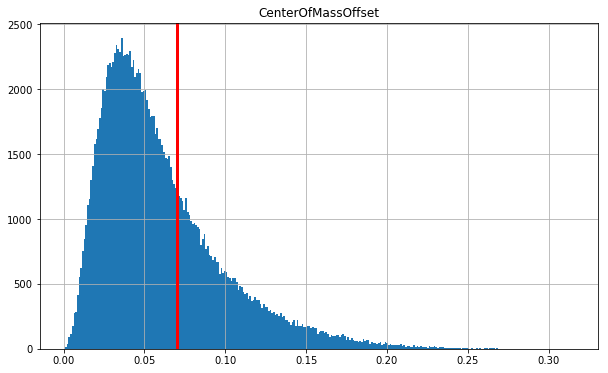

In [16]:
hist_with_criteria(halos_list, 'CenterOfMassOffset', vir_crit)
plt.axvline(0.07,c='r',lw=3.0)

Let's look at how the combined doff and fsub criteria distributions look to see what we **cannot remove without the virial ratio criterion**

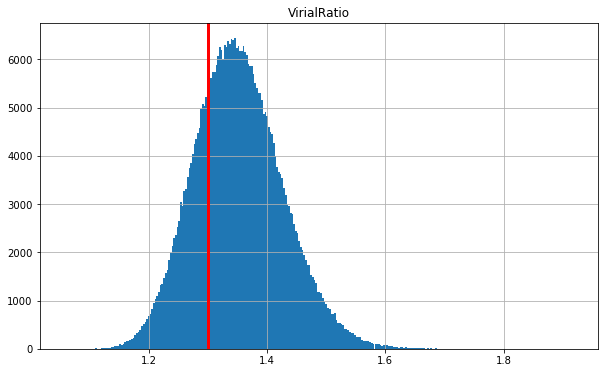

In [17]:
hist_with_criteria(halos_list, 'VirialRatio', fsub_crit&doff_crit )
plt.axvline(1.3,c='r',lw=3.0)
#plt.text((0.8,0.8),'%.3f'%fraction,textcoords='axes')

In [18]:
print 'Out of %d'%halos_list.shape[0],' halos in the z=1.0 sample, %d'%halos_list.loc[fsub_crit&doff_crit].shape[0],\
' remain when we cut on substructure and offset, and only %d'%halos_list.loc[vir_crit&fsub_crit&doff_crit].shape[0],\
' remain when we additionally cut on virial ratio.'

Out of 910044  halos in the z=1.0 sample, 411564  remain when we cut on substructure and offset, and only 102461  remain when we additionally cut on virial ratio.


Now, let's look at the distributions with some mass or radius cut (still need to know the units!)

In [19]:
radius_cut_8 = halos_list['Radius200'] > 0.8
halos_list_8R200c = halos_list[radius_cut_8]

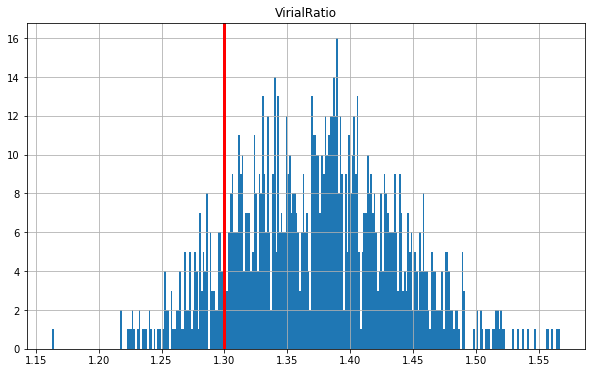

In [20]:
hist_with_criteria(halos_list_8R200c, 'VirialRatio', fsub_crit&doff_crit, bins=30 )
plt.axvline(1.3,c='r',lw=3.0)

In [21]:
radius_cut_6 = halos_list['Radius200'] > 0.6
halos_list_6R200c = halos_list[radius_cut_6]

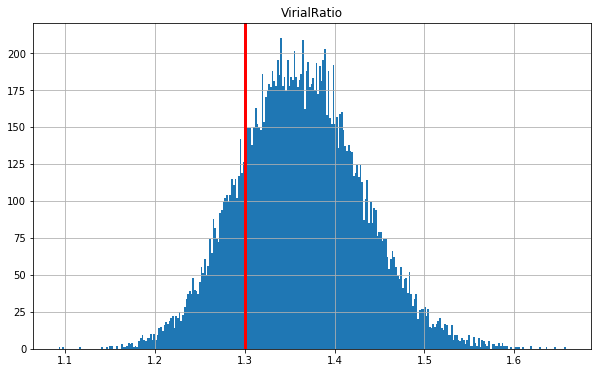

In [22]:
hist_with_criteria(halos_list_6R200c, 'VirialRatio', fsub_crit&doff_crit, bins=30 )
plt.axvline(1.3,c='r',lw=3.0)

    As mentioned in the 12/14/18 fgas telecon, the reason for choosing "relaxed" clusters is because we expect the M-c relation to differ, particularly at large masses.  While I do not have current access to a list of concentrations, I can look at mass versus: EinastoParameter_0, EinastoParameter_1, EinastoParameter_2 with different cuts, and compare with Ludlow+13: https://arxiv.org/pdf/1302.0288.pdf

## Here, we examine the distribution of Einasto parameters that are immediately available

We expect there to be a shift in concentration with the relaxedness criterion (Duffy+13) of even just doff.  We check the shift in parameters with the various cuts, including a mass cut.

In [23]:
print 'all: ',halos_list.shape
print 'M>1e14: ', halos_list.loc[mass_crit].shape
print 'M>1e14, doff: ', halos_list.loc[mass_crit&doff_crit].shape
print 'M>1e14, doff, fsub: ', halos_list.loc[mass_crit&doff_crit].shape
print 'M>1e14, doff, vir: ', halos_list.loc[mass_crit&doff_crit&vir_crit].shape

all:  (910044, 18)
M>1e14:  (115504, 18)
M>1e14, doff:  (52702, 18)
M>1e14, doff, fsub:  (52702, 18)
M>1e14, doff, vir:  (10756, 18)


In [24]:
def plot_histogram(ax, cut, column) :
    n, bins, patches = ax.hist(np.log10(halos_list.loc[cut].dropna().as_matrix(columns=[column])),bins=300,log=True,normed=True)
    print sum(n)
def logparam_cut(df, cut, column) :
    return np.log10(halos_list.loc[cut].dropna().as_matrix(columns=[column]))

In [25]:
def param_distributions(param) :
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flatten()
    ax0.hist(logparam_cut(halos_list,mass_crit,param),bins=300)
    ax0.text(0.05,0.8,'M>1e14',transform=ax0.transAxes,horizontalalignment='left')
    ax1.hist(logparam_cut(halos_list,mass_crit&doff_crit,param),bins=300)
    ax1.text(0.05,0.8,'M>1e14, doff',transform=ax1.transAxes,horizontalalignment='left')
    ax2.hist(logparam_cut(halos_list,mass_crit&doff_crit&fsub_crit,param),bins=300)
    ax2.text(0.05,0.8,'M>1e14, doff, fsub',transform=ax2.transAxes,horizontalalignment='left')
    ax3.hist(logparam_cut(halos_list,mass_crit&doff_crit&fsub_crit&vir_crit,param),bins=300)
    ax3.text(0.05,0.8,'M>1e14, doff, fsub, vir',transform=ax3.transAxes,horizontalalignment='left')


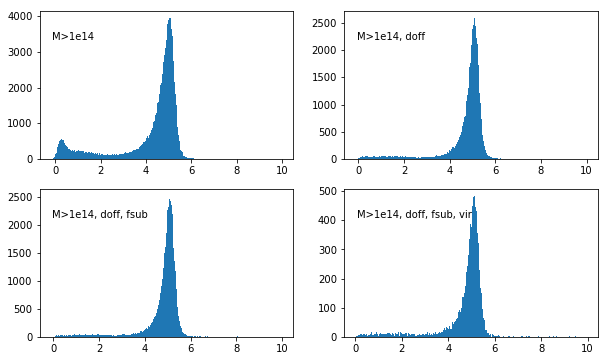

In [26]:
param_distributions('EinastoParameter_0')

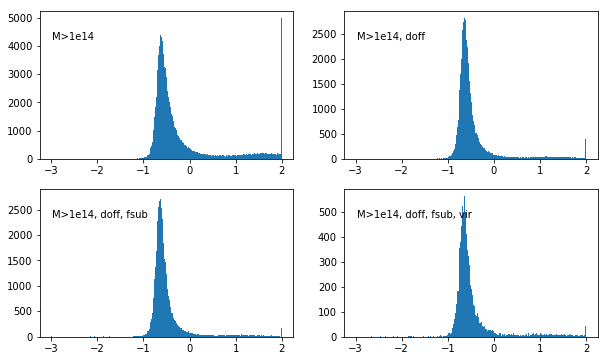

In [27]:
param_distributions('EinastoParameter_1')

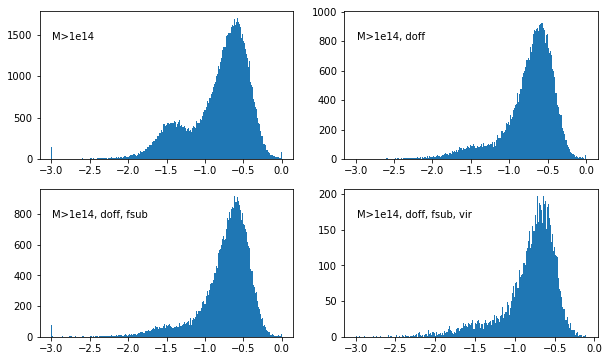

In [28]:
param_distributions('EinastoParameter_2')

In [29]:
halos_list.loc[mass_crit].dropna().as_matrix(columns=['# Mass200'])
#param_distributions('# Mass200')

array([[137288.0],
       [136077.0],
       [131290.0],
       ..., 
       ['3086.79'],
       ['3086.79'],
       ['3086.79']], dtype=object)

In [30]:
def Mass_Param(cut, param) :
    plt.scatter(np.log10(halos_list.loc[cut].dropna().as_matrix(columns=['# Mass200'])),
            np.log10(halos_list.loc[cut].dropna().as_matrix(columns=[param])))

halos_list['# Mass200'] = halos_list['# Mass200'].convert_objects(convert_numeric=True)
halos_list.loc[mass_crit].dropna().as_matrix()

/home/babyostrich/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


array([[  1.37288000e+05,   1.29540000e+00,   1.13748000e+03, ...,
          3.24963000e+01,   4.67686000e+04,  -2.77317000e+01],
       [  1.36077000e+05,   1.29158000e+00,   2.72949000e+03, ...,
          1.55388000e+00,   7.60579000e+04,  -2.11562000e+01],
       [  1.31290000e+05,   1.27626000e+00,   4.96582000e+02, ...,
          1.57510000e+04,   4.49426000e+04,   1.00063000e+00],
       ..., 
       [  3.08679000e+03,   3.65619000e-01,   1.33550000e+03, ...,
          1.92724000e+02,   9.25104000e+04,  -1.30593000e+00],
       [  3.08679000e+03,   3.65619000e-01,   1.83668000e+03, ...,
          2.47903000e+05,   7.61071000e+04,   2.98432000e+00],
       [  3.08679000e+03,   3.65619000e-01,   1.49723000e+03, ...,
          2.36729000e+00,   5.25870000e+04,  -3.27263000e+01]])

In [31]:
def mass_einasto(param) :
    fig, axes = plt.subplots(nrows=1, ncols=3)
    ax0, ax1, ax2 = axes.flatten()
    ax0.scatter(logparam_cut(halos_list,mass_crit,param),logparam_cut(halos_list,mass_crit,'# Mass200'),s=1)
    ax0.text(0.05,0.8,'M>1e14',transform=ax0.transAxes,horizontalalignment='left')
    ax1.scatter(logparam_cut(halos_list,mass_crit&doff_crit,param),
                logparam_cut(halos_list,mass_crit&doff_crit,'# Mass200'),s=1)
    ax1.text(0.05,0.8,'M>1e14, doff',transform=ax1.transAxes,horizontalalignment='left')
    ax2.scatter(logparam_cut(halos_list,mass_crit&doff_crit&vir_crit,param),
                logparam_cut(halos_list,mass_crit&doff_crit&vir_crit,'# Mass200'),s=1)
    ax2.text(0.05,0.8,'M>1e14, doff, vir',transform=ax2.transAxes,horizontalalignment='left')
    for ax in [ax0,ax1,ax2] :
        ax.set_ylim(3.75,6)
        
def mass_einasto_hist2d(param) :
    from matplotlib.colors import LogNorm
    fig, axes = plt.subplots(nrows=1, ncols=3)
    ax0, ax1, ax2 = axes.flatten()
    ax0.hist2d(logparam_cut(halos_list,mass_crit,param),logparam_cut(halos_list,mass_crit,'# Mass200'),bins=40, norm=LogNorm())
    ax0.text(0.05,0.8,'M>1e14',transform=ax0.transAxes,horizontalalignment='left')
    ax1.scatter(logparam_cut(halos_list,mass_crit&doff_crit,param),
                logparam_cut(halos_list,mass_crit&doff_crit,'# Mass200'),s=1)
    ax1.text(0.05,0.8,'M>1e14, doff',transform=ax1.transAxes,horizontalalignment='left')
    ax2.scatter(logparam_cut(halos_list,mass_crit&doff_crit&vir_crit,param),
                logparam_cut(halos_list,mass_crit&doff_crit&vir_crit,'# Mass200'),s=1)
    ax2.text(0.05,0.8,'M>1e14, doff, vir',transform=ax2.transAxes,horizontalalignment='left')
    for ax in [ax0,ax1,ax2] :
        ax.set_ylim(3.75,6)


ValueError: too many values to unpack

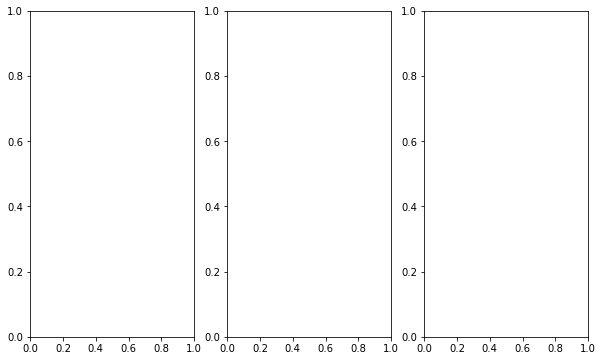

In [32]:
mass_einasto_hist2d('EinastoParameter_0')

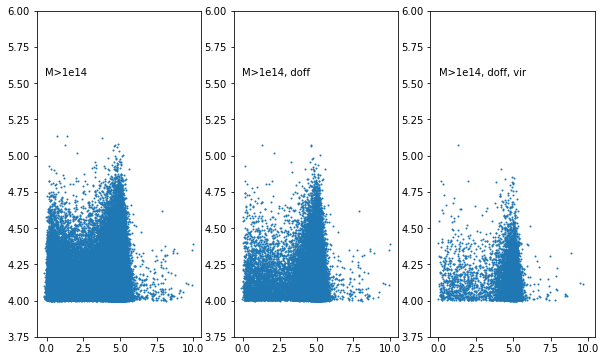

In [35]:
mass_einasto('EinastoParameter_0')

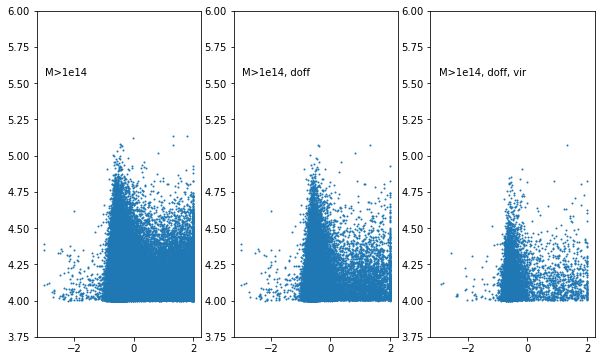

In [36]:
mass_einasto('EinastoParameter_1')

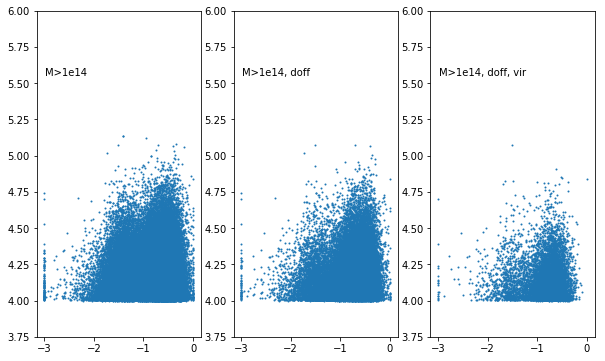

In [37]:
mass_einasto('EinastoParameter_2')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
groups = [ 'M>1e14', 'M>1e14, doff', 'M>1e14, doff, vir' ]
crit = [mass_crit, mass_crit&doff_crit, mass_crit&doff_crit&vir_crit]
data = []
for cr in crit :
    data.append(halos_list.loc[cut].dropna().as_matrix(columns=['# Mass200',param])


data = ()
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

In [ ]:
Mass_Param(mass_crit,'EinastoParameter_0')

In [ ]:
Mass_Param(mass_crit&doff_crit&vir_crit,'EinastoParameter_0')

In [33]:
def scatter_with_criteria(figure, df, columnx, columny, criteria,color) :
    ''' Plot the distribution of column given a criterion '''
    import numpy as np
    ax = plt.gca()
    ax.scatter(df.loc[criteria,columnx].values, df.loc[criteria,columny].values,s=2,c=color)
    ax.set_xlabel(columnx,fontsize='x-large')
    ax.set_ylabel(columny,fontsize='x-large')
    plt.xlim(40000,150000)
    #ax.set_yscale('log')
    #ax.set_xscale('log')

In [34]:
fig = plt.figure()
scatter_with_criteria(fig, halos_list,'# Mass200', 'EinastoParameter_0',(fsub_crit&mass_cut),'b')
scatter_with_criteria(fig, halos_list,'# Mass200', 'EinastoParameter_0',(fsub_crit&doff_crit&mass_cut),'m')
scatter_with_criteria(fig, halos_list,'# Mass200', 'EinastoParameter_0',(vir_crit&fsub_crit&doff_crit&mass_cut),'c')

#print halos_list.loc[fsub_crit,'# Mass200'].values.min()
#print halos_list.loc[fsub_crit,'EinastoParameter_0'].values.min()

NameError: name 'mass_cut' is not defined

In [ ]:
fig = plt.figure()
scatter_with_criteria(fig, halos_list,'# Mass200', 'EinastoParameter_1',fsub_crit&mass_cut,'b')
scatter_with_criteria(fig, halos_list,'# Mass200', 'EinastoParameter_1',(fsub_crit&doff_crit)&mass_cut,'m')
scatter_with_criteria(fig, halos_list,'# Mass200', 'EinastoParameter_1',(fsub_crit&doff_crit&vir_crit)&mass_cut,'c')


In [ ]:
fig = plt.figure()
scatter_with_criteria(fig, halos_list,'# Mass200', 'EinastoParameter_2',fsub_crit&mass_cut,'b')
scatter_with_criteria(fig, halos_list,'# Mass200', 'EinastoParameter_2',(fsub_crit&doff_crit)&mass_cut,'m')
scatter_with_criteria(fig, halos_list,'# Mass200', 'EinastoParameter_2',(fsub_crit&doff_crit&vir_crit)&mass_cut,'c')


In [ ]:
halos_list.loc[fsub_crit&mass_cut,'# Mass200'].values.min()

In [ ]:
halos_list.loc[fsub_crit&mass_cut,'# Mass200']

In [ ]:
np.log10(.3)